<a href="https://colab.research.google.com/github/kimtaerang/lectures-bigphys/blob/master/y%3Dsin(kx).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.283326765188626 1.9986242370654945


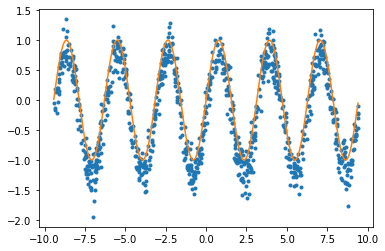

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random

x =[]
y =[]
for i in range(1000):
    x0 = random.uniform(-3*np.pi,3*np.pi)
    y0 = np.sin(2*x0)+random.gauss(-0.2,0.2)
    x.append(x0)
    y.append(y0)
    
plt.plot(x,y,'.')
#k 값 지정
def f(x, k=1):
    return sin(k*x)

bestLoss = 1e9
bestK = 0
dt = 0.001
lossHistory = []
kHistory = []
k = 2
for i in range(5000):
  kGrad = [-2 * (y[i] - f(x[i], k)) * x[i] * np.cos(k*x[i]) for i in range(len(y))]
  k -= sum(kGrad)/len(kGrad)*dt
  
  reses = [(y[i]-f(x[i],k))**2 for i in range(len(y))]
  loss = sqrt(sum(reses)/len(reses))
  lossHistory.append(loss)
  kHistory.append(k)
  if loss < bestLoss:
    bestK= k
    bestLoss = loss
print(bestLoss, bestK)
xpoint = []
#np.arange -> for문에서 range를 쓰면 float형은 나눠줄 수 없어 x구간을 나눠주기 위해 arange를 사용
for i in np.arange(-3*np.pi,3*np.pi,6*np.pi/1000):
    xpoint.append(i)


ypoint = [f(xpoint[i], bestK) for i in range(len(xpoint))]
plt.plot(xpoint, ypoint, '-')

